In [1]:
import ROOT

In [2]:
rootfile = 'tuples/2500_3_dtf.root'
file = ROOT.TFile.Open(rootfile)
filetuple = file['Higgs']
treename = 'Tuple'
df = ROOT.RDataFrame(treename, filetuple)

In [3]:
x = ROOT.RooRealVar('x','mass observable', 0, 4500)
roo_data_set_hmass = df.Book(ROOT.std.move(ROOT.RooDataSetHelper('dataset', 'h mass' , ROOT.RooArgSet(x))), (['H_MASS']))
data = roo_data_set_hmass.GetValue()

[#1] INFO:DataHandling -- RooDataSetHelper::FillDataSet(dataset) Skipping event because x cannot accommodate the value 5088.89
[#1] INFO:DataHandling -- RooDataSetHelper::FillDataSet(dataset) Skipping event because x cannot accommodate the value 11901.1
[#1] INFO:DataHandling -- RooDataSetHelper::FillDataSet(dataset) Skipping event because x cannot accommodate the value 5032.21
[#1] INFO:DataHandling -- RooDataSetHelper::FillDataSet(dataset) Skipping event because x cannot accommodate the value 4907.2
[#1] INFO:DataHandling -- RooDataSetHelper::FillDataSet(dataset) Skipping ...
[#0] WARNING:DataHandling -- RooDataSetHelper::Finalize(dataset) Ignored 106 out-of-range events


## Gaussian 


[#0] WARNING:InputArguments -- The parameter 'sigma' with range [-150, 150] of the RooGaussian 'gauss' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Fitting -- RooAbsPdf::fitTo(gauss_over_gauss_Int[x]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- using CPU computation library compiled with -mavx2
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_gauss_over_gauss_Int[x]_dataset) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
Minuit2Minimizer: Minimize with max-calls 1000 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 83813.2878421441856
Edm   = 3.80042916780822378e-05
Nfcn  = 53
mean	  = 2451.24	 +/-  1.74039	(limited)
sigma	  = 150	 +/-  0.00104009	(limited)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       131395.1278 Edm =       23308.31471 NCalls =      9
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 131395.1278
  Edm           : 23308.31471
  Internal parameters:	[     0.3398369095     0.7297276562]	
  Internal gradient  :	[      5122.321401     -193776.5613]	
  Internal covariance matrix:
[[   0.0001533175              0]
 [              0  2.3758194e-06]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 1000
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =       131395.1278 Edm =       23308.31471 NCalls =      9
Info in <Minuit2>: VariableMetricBuilder    1 - FCN =        86649.2142 Edm =       575.1928157 NCalls =     21
Info in <Minuit2>: VariableMetricBuilder    2 - FCN =       83856.90201 Edm =       13.89875216 NCalls =     31
Info in <Minuit2>: VariableMetr

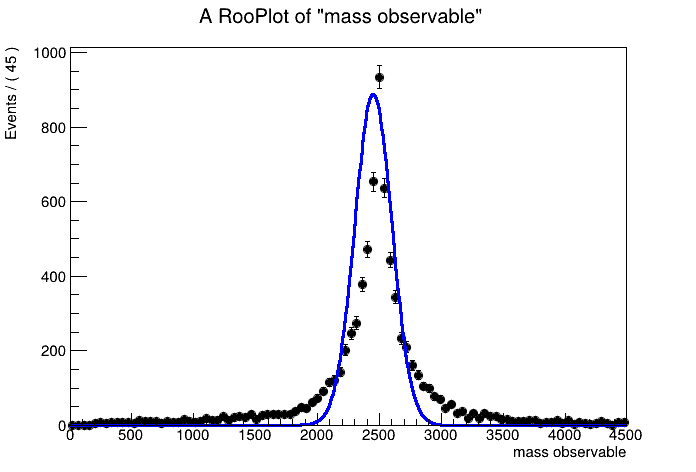

In [4]:
mean = ROOT.RooRealVar('mean', 'typical mean', 2500.,2300.,2600.)
sigma = ROOT.RooRealVar('sigma', 'typical sigma', 100.,-150.,150.) #the first number is the initial value 
gauss = ROOT.RooGaussian('gauss', 'gauss(x,mean,sigma)', x,mean,sigma)

gauss.fitTo(data)

c = ROOT.TCanvas()
xframe = x.frame()
data.plotOn(xframe,ROOT.RooFit.Binning(100))
gauss.plotOn(xframe)
xframe.Draw()
c.Draw()

## Double Gaussian

[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [-150, 150] of the RooGaussian 'gauss1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma2' with range [-150, 150] of the RooGaussian 'gauss2' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Fitting -- RooAbsPdf::fitTo(double_gauss) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_double_gauss_dataset) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
Minuit2Minimizer: Minimize with max-calls 2500 convergence for edm < 1 strategy 1
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (-inf) to force MIGRAD to back o

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =                 0 Edm =                 0 NCalls =     21
Info in <Minuit2>: NegativeG2LineSearch Doing a NegativeG2LineSearch since one of the G2 component is negative
Info in <Minuit2>: MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 0
  Edm           : 0
  Internal parameters:	[                0                0     0.3398369095     0.3398369095     0.2699327958]	
  Internal gradient  :	[                0                0                0                0                0]	
  Internal covariance matrix:
[[              2              0              0              0              0]
 [              0              2              0              0              0]
 [              0              0              2              0              0]
 [              0              0              0              2              0]
 [           

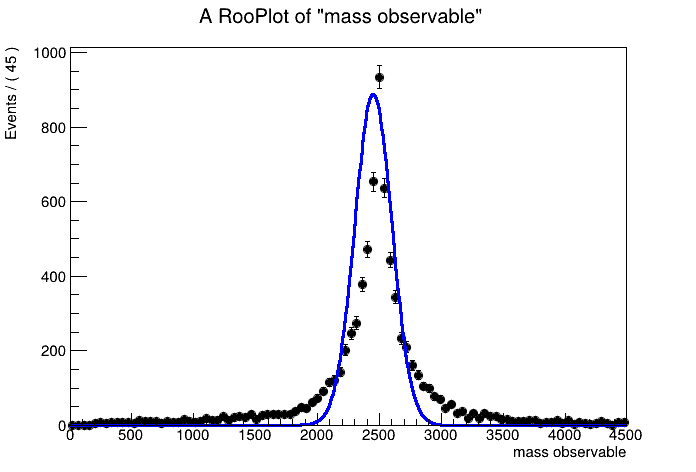

In [5]:
mean = ROOT.RooRealVar('mean', 'mean of both gaussians', 2500, 2300, 2600)
sigma1 = ROOT.RooRealVar('sigma1', 'sigma of first gaussian', 50, -150, 150)
N1 = ROOT.RooRealVar('N1', 'normalization of first gaussian', 0.5, 0.0, 1.0)
gauss1 = ROOT.RooGaussian('gauss1', 'gauss1(x,mean,sigma1)', x, mean, sigma1)
sigma2 = ROOT.RooRealVar('sigma2', 'sigma of second gaussian', 40, -150, 150)
N2 = ROOT.RooRealVar('N2', 'normalization of second gaussian', 0.5, 0.0, 1.0)
gauss2 = ROOT.RooGaussian('gauss2', 'gauss2(x,mean,sigma2)', x, mean, sigma2)

sum_N1_N2 = ROOT.RooRealVar('sum_N1_N2', 'sum of normalizations', 1.0, 0.0, 2.0)

double_gauss = ROOT.RooAddPdf('double_gauss', 'double gaussian',
                              ROOT.RooArgList(gauss1, gauss2),
                              ROOT.RooArgList(N1, N2))

double_gauss.fitTo(data)

# Plot the data and the fit result
c2 = ROOT.TCanvas()
xframe2 = x.frame()
data.plotOn(xframe2, ROOT.RooFit.Binning(100))
double_gauss.plotOn(xframe2)
xframe.Draw()
c2.Draw()

## Crystal Ball 

[#1] INFO:Fitting -- RooAbsPdf::fitTo(crystalball_over_crystalball_Int[x]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_crystalball_over_crystalball_Int[x]_dataset) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
Minuit2Minimizer: Minimize with max-calls 2000 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 55837.8216217173031
Edm   = 1.42696464412040925e-05
Nfcn  = 341
alpha	  = 1.84196	 +/-  0.0626597	(limited)
mu	  = 2521.45	 +/-  4.74668	(limited)
n	  = 1.2174	 +/-  0.174221	(limited)
sigma	  = 374.808	 +/-  3.67684	(limited)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =        82248.4139 Edm =       17671.60491 NCalls =     17
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 82248.4139
  Edm           : 17671.60491
  Internal parameters:	[       -0.7997354                0     -1.107841599    -0.6475151779]	
  Internal gradient  :	[      6503.971278     -20080.23178      2909.109383     -127975.9303]	
  Internal covariance matrix:
[[  5.4873627e-05              0              0              0]
 [              0  4.6274508e-05              0              0]
 [              0              0   0.0002645339              0]
 [              0              0              0  2.8982968e-06]]]
Info in <Minuit2>: VariableMetricBuilder Start iterating until Edm is < 0.001 with call limit = 2000
Info in <Minuit2>: VariableMetricBuilder    0 - FCN =        82248.4139 Edm =       17671.60491 NCalls =     17


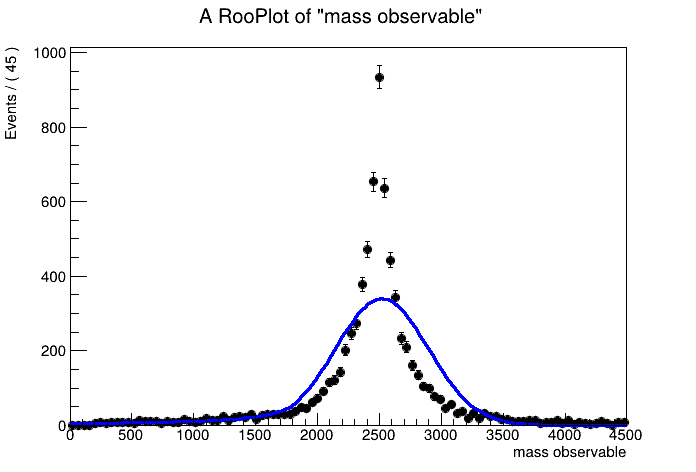

In [6]:
alpha = ROOT.RooRealVar("alpha", "alpha", 1.5, 0.1, 10)
n = ROOT.RooRealVar("n", "n", 2, 1, 20)  
sigma = ROOT.RooRealVar("sigma", "sigma", 100, 1, 500)  

mu = ROOT.RooRealVar("mu", "mu", 2500, 2200, 2800)
N = ROOT.RooRealVar("N", "N", 1, 0, 10000)

# Define the Crystal Ball PDF
crystalball = ROOT.RooCrystalBall("crystalball", "crystalball", x, mu, sigma, alpha, n)


crystalball.fitTo(data)

c3 = ROOT.TCanvas()
xframe3 = x.frame()
data.plotOn(xframe3,ROOT.RooFit.Binning(100))
crystalball.plotOn(xframe3)
xframe3.Draw()
c3.Draw()
c3.SaveAs('crystalballfit.png')

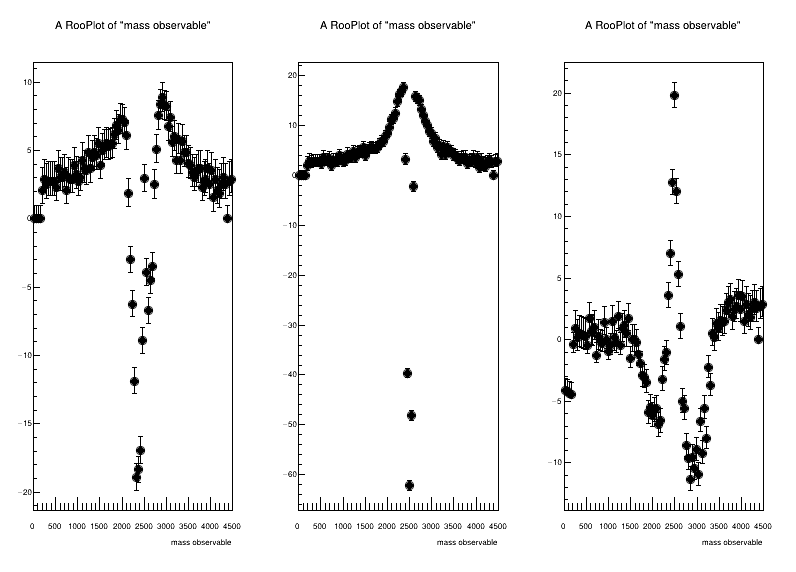

In [7]:
pull_frame = x.frame()
pull_frame2 = x.frame()
pull_frame3 = x.frame()
# Plot the pull distribution
pull_hist = xframe.pullHist()
pull_frame.addPlotable(pull_hist, "P")

pull_hist2 = xframe2.pullHist()
pull_frame2.addPlotable(pull_hist2, "P")

pull_hist3 = xframe3.pullHist()
pull_frame3.addPlotable(pull_hist3, "P")

# Draw the pull distribution
c4 = ROOT.TCanvas("c2", "Pull Distribution", 800, 600)
c4.Divide(3)
c4.cd(1)
pull_frame.Draw()
c4.cd(2)
pull_frame2.Draw('SAME')
c4.cd(3)
pull_frame3.Draw('SAME')
c4.Draw()

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Fitting -- RooAbsPdf::fitTo(model) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_dataset) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
Minuit2Minimizer: Minimize with max-calls 3500 convergence for edm < 1 strategy 1
RooAbsMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (58207.2) to force MIGRAD to back out of this region. Error log follows.
Parameter values: 	N_bkg=3998.84	N_cb=3675.92	alpha=8.84341	lambda_bkg=-0.730053	mu=741.879	n=14.6941	sigma=20.8213
RooAddPdf::model[ N_cb * crystalball_over_crystalball_Int[x] + N_bkg * background_over_background_Int[x] ]
     getLogVal() top-level p.d.f not greater than zero @ !refCoefNorm=(x = 2250), !pdf

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =        52880.7362 Edm =       13858.44612 NCalls =     31
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 52880.7362
  Edm           : 13858.44612
  Internal parameters:	[     -1.550795993     -1.550795993       -0.7997354      1.507540228     -0.848062079     -1.107841599    -0.6475151779]	
  Internal gradient  :	[     -215956.4875      -526608.711      809.6192582     -101084.5209     -16103.93437     -187.0903023     -3788.052595]	
  Internal covariance matrix:
[[   3.756649e-07              0              0              0              0              0              0]
 [              0  9.5889746e-08              0              0              0              0              0]
 [              0              0   0.0001938981              0              0              0              0]
 [              0              0          

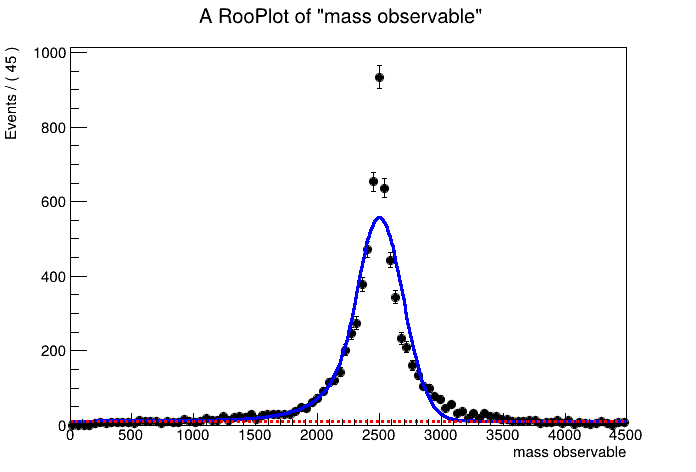

In [8]:
alpha = ROOT.RooRealVar("alpha", "alpha", 1.5, 0.1, 10)
n = ROOT.RooRealVar("n", "n", 2, 1, 20)
sigma = ROOT.RooRealVar("sigma", "sigma", 100, 1, 500)
mu = ROOT.RooRealVar("mu", "mu", 2500, 0, 20000)
N_cb = ROOT.RooRealVar("N_cb", "N_cb", 1, 0, 10000)

# Define the Crystal Ball PDF
crystalball = ROOT.RooCrystalBall("crystalball", "crystalball", x, mu, sigma, alpha, n)

# Define a background model (exponential in this case)
lambda_bkg = ROOT.RooRealVar("lambda_bkg", "slope of exponential", -0.001, -1, 0)
background = ROOT.RooExponential("background", "exponential PDF", x, lambda_bkg)

# Define the fraction of signal vs. background
N_bkg = ROOT.RooRealVar("N_bkg", "N_bkg", 1, 0, 10000)
frac = ROOT.RooRealVar("frac", "fraction of signal", 0.5, 0.0, 1.0)

# Combine the signal and background models
model = ROOT.RooAddPdf("model", "signal + background", ROOT.RooArgList(crystalball, background), ROOT.RooArgList(N_cb, N_bkg))

# Fit the model to the data
model.fitTo(data)

# Plot the data and the fit result
c3 = ROOT.TCanvas()
xframe3 = x.frame()
data.plotOn(xframe3, ROOT.RooFit.Binning(100))
model.plotOn(xframe3)
model.plotOn(xframe3, ROOT.RooFit.Components("background"), ROOT.RooFit.LineStyle(ROOT.kDashed), ROOT.RooFit.LineColor(ROOT.kRed))
xframe3.Draw()
c3.Draw()
c3.SaveAs('newcrystal.png')


[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Fitting -- RooAbsPdf::fitTo(model) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_dataset) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
Minuit2Minimizer: Minimize with max-calls 3500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 46627.9578250491541
Edm   = 2.99188505899445419e-05
Nfcn  = 307
N1	  = 1	 +/-  0.000171405	(limited)
N2	  = 1	 +/-  0.000180161	(limited)
frac_gauss	  = 1	 +/-  0.000288496	(limited)
lambda_bkg	  = -5.56666e-11	 +/-  3.30286e-06	(limited)
mean	  = 2489.06	 +/-  2.2852	(limited)
sigma1	  = 280.473	 +/-  5.81086	(limited)
sigma2	  = 91.716	 +/-  2.71087	(limited)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setO

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       54735.79434 Edm =       19530.67928 NCalls =     29
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 54735.79434
  Edm           : 19530.67928
  Internal parameters:	[     0.2013579208    -0.2013579208     0.6435011088      1.507540228      1.176005207    -0.7372313956    -0.3445706997]	
  Internal gradient  :	[     -1720.540123     -3116.417057     -1387.216431     -124896.3169      1229.643271     -1939.435478     -4620.299065]	
  Internal covariance matrix:
[[    0.001625996              0              0              0              0              0              0]
 [              0   0.0013238718              0              0              0              0              0]
 [              0              0   0.0012259287              0              0              0              0]
 [              0              0         

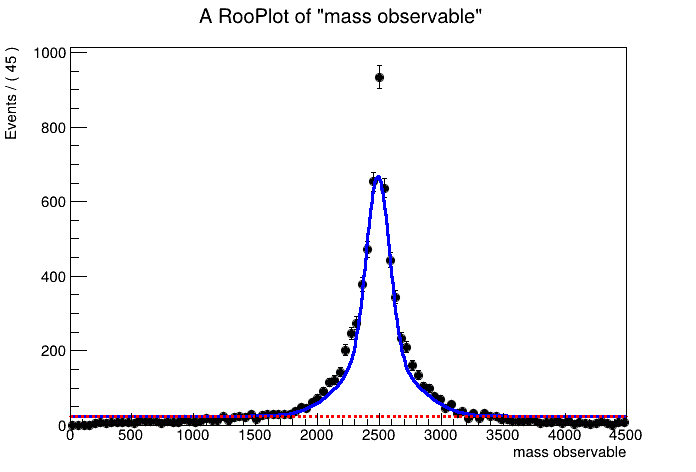

In [9]:
mean = ROOT.RooRealVar('mean', 'mean of both gaussians', 2500, 0, 2600)

sigma1 = ROOT.RooRealVar('sigma1', 'sigma of first gaussian', 50, 1, 300)
N1 = ROOT.RooRealVar('N1', 'normalization of first gaussian', 0.6, 0.0, 1.0)
gauss1 = ROOT.RooGaussian('gauss1', 'gauss1(x,mean,sigma1)', x, mean, sigma1)

sigma2 = ROOT.RooRealVar('sigma2', 'sigma of second gaussian', 100, 1, 300)
N2 = ROOT.RooRealVar('N2', 'normalization of second gaussian', 0.4, 0.0, 1.0)
gauss2 = ROOT.RooGaussian('gauss2', 'gauss2(x,mean,sigma2)', x, mean, sigma2)

# Define a background model (optional, exponential in this case)
lambda_bkg = ROOT.RooRealVar("lambda_bkg", "slope of exponential", -0.001, -1, 0)
background = ROOT.RooExponential("background", "exponential PDF", x, lambda_bkg)

# Combine the signal and background models
frac_gauss = ROOT.RooRealVar("frac_gauss", "fraction of signal", 0.8, 0.0, 1.0)
model = ROOT.RooAddPdf("model", "double gaussian + background",
                       ROOT.RooArgList(gauss1, gauss2, background),
                       ROOT.RooArgList(N1, N2, frac_gauss))

# Fit the model to the data
model.fitTo(data)

# Plot the data and the fit result
c2 = ROOT.TCanvas()
xframe2 = x.frame()
data.plotOn(xframe2, ROOT.RooFit.Binning(100))
model.plotOn(xframe2)
model.plotOn(xframe2, ROOT.RooFit.Components("background"), ROOT.RooFit.LineStyle(ROOT.kDashed), ROOT.RooFit.LineColor(ROOT.kRed))
xframe2.Draw()
c2.Draw()

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Fitting -- RooAbsPdf::fitTo(model) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_dataset) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
Minuit2Minimizer: Minimize with max-calls 4500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 44223.6883217010982
Edm   = 1.06646689912638342e-05
Nfcn  = 462
N1	  = 1	 +/-  0.000248125	(limited)
N2	  = 1	 +/-  0.000253189	(limited)
N3	  = 1	 +/-  0.000248119	(limited)
frac_gauss	  = 1	 +/-  0.00035222	(limited)
lambda_bkg	  = -4.25174e-11	 +/-  6.21798e-06	(limited)
mean	  = 2490.28	 +/-  2.12328	(limited)
sigma1	  = 324.668	 +/-  13.3519	(limited)
sigma2	  = 67.6736	 +/-  2.52848	(limited)
sigma3	  = 2

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       52967.23977 Edm =       93776.53881 NCalls =     37
Info in <Minuit2>: NegativeG2LineSearch Doing a NegativeG2LineSearch since one of the G2 component is negative
Info in <Minuit2>: MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 45936.48467
  Edm           : 3945.002037
  Internal parameters:	[     0.4115168461      1.561121351      1.562498642     0.6435011088      1.507540228                0      1.358741602    -0.5504209962    -0.2038129369]	
  Internal gradient  :	[     -1185.055279     -11.66218333     -9.930403108     -404.9955562     -26595.42734      112.2366212     -22.53317945      399.1005883     -170.0714324]	
  Internal covariance matrix:
[[   0.0023554861              0              0              0              0              0              0              0              0]
 [              0   0.0016592183  

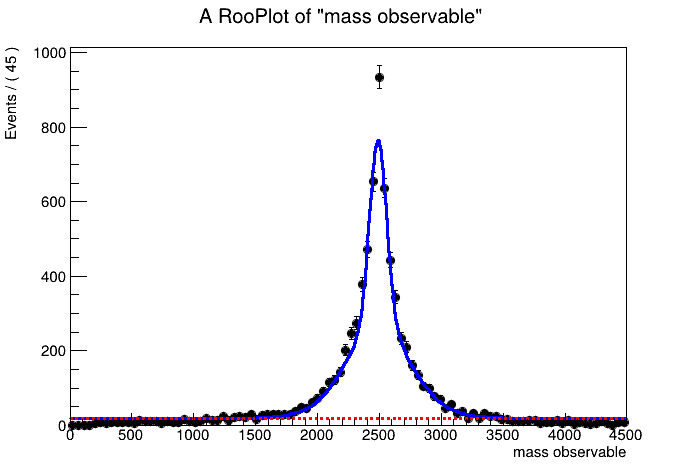

In [10]:
mean = ROOT.RooRealVar('mean', 'mean of both gaussians', 2500, 2400, 2600)

# Adjusted parameter ranges and initial values
sigma1 = ROOT.RooRealVar('sigma1', 'sigma of first gaussian', 80, 1, 500)
N1 = ROOT.RooRealVar('N1', 'normalization of first gaussian', 0.7, 0.0, 1.0)
gauss1 = ROOT.RooGaussian('gauss1', 'gauss1(x,mean,sigma1)', x, mean, sigma1)

sigma2 = ROOT.RooRealVar('sigma2', 'sigma of second gaussian', 120, 1, 500)
N2 = ROOT.RooRealVar('N2', 'normalization of second gaussian', 0.3, 0.0, 1.0)
gauss2 = ROOT.RooGaussian('gauss2', 'gauss2(x,mean,sigma2)', x, mean, sigma2)

# Optional third Gaussian to capture more details
sigma3 = ROOT.RooRealVar('sigma3', 'sigma of third gaussian', 200, 1, 500)
N3 = ROOT.RooRealVar('N3', 'normalization of third gaussian', 0.1, 0.0, 1.0)
gauss3 = ROOT.RooGaussian('gauss3', 'gauss3(x,mean,sigma3)', x, mean, sigma3)

# Define a background model (exponential in this case)
lambda_bkg = ROOT.RooRealVar("lambda_bkg", "slope of exponential", -0.001, -1, 0)
background = ROOT.RooExponential("background", "exponential PDF", x, lambda_bkg)

# Combine the signal and background models
frac_gauss = ROOT.RooRealVar("frac_gauss", "fraction of signal", 0.8, 0.0, 1.0)
model = ROOT.RooAddPdf("model", "triple gaussian + background",
                       ROOT.RooArgList(gauss1, gauss2, gauss3, background),
                       ROOT.RooArgList(N1, N2, N3, frac_gauss))

# Fit the model to the data
model.fitTo(data)

# Plot the data and the fit result
c2 = ROOT.TCanvas()
xframe2 = x.frame()
data.plotOn(xframe2, ROOT.RooFit.Binning(100))
model.plotOn(xframe2)
model.plotOn(xframe2, ROOT.RooFit.Components("background"), ROOT.RooFit.LineStyle(ROOT.kDashed), ROOT.RooFit.LineColor(ROOT.kRed))
xframe2.Draw()
c2.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


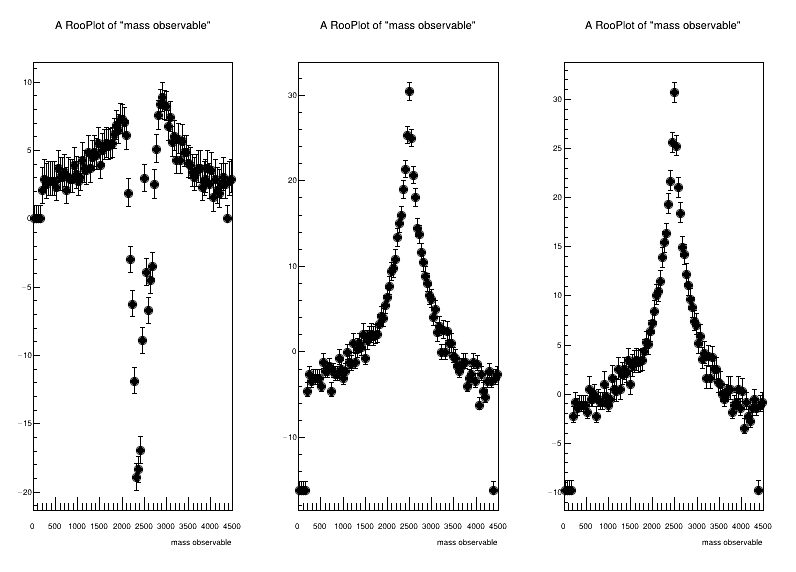

In [11]:
pull_frame = x.frame()
pull_frame2 = x.frame()
pull_frame3 = x.frame()
# Plot the pull distribution
pull_hist = xframe.pullHist()
pull_frame.addPlotable(pull_hist, "P")

pull_hist2 = xframe2.pullHist()
pull_frame2.addPlotable(pull_hist2, "P")

pull_hist3 = xframe3.pullHist()
pull_frame3.addPlotable(pull_hist3, "P")

# Draw the pull distribution
c4 = ROOT.TCanvas("c2", "Pull Distribution", 800, 600)
c4.Divide(3)
c4.cd(1)
pull_frame.Draw()
c4.cd(2)
pull_frame2.Draw('SAME')
c4.cd(3)
pull_frame3.Draw('SAME')
c4.Draw()